In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [22]:
df = pd.read_excel("RBI.xlsx", engine="openpyxl")
df.shape

(121, 2)

In [23]:
df.head()

,Date,Value
0,"June 1, 2020",4764.812000
1,"June 2, 2020",4781.974663
2,"June 3, 2020",4426.915552
3,"June 4, 2020",4424.531824
4,"June 5, 2020",4321.009311


In [24]:
df["Date"] = pd.to_datetime(df["Date"])

In [25]:
df.head()

,Date,Value
0,2020-06-01,4764.812000
1,2020-06-02,4781.974663
2,2020-06-03,4426.915552
3,2020-06-04,4424.531824
4,2020-06-05,4321.009311


In [26]:
df["Date"].min(), df["Date"].max()

(Timestamp('2020-06-01 00:00:00'), Timestamp('2020-09-29 00:00:00'))

In [27]:
df.set_index("Date", inplace=True)

In [28]:
df.head()

,Value
Date,
2020-06-01,4764.812000
2020-06-02,4781.974663
2020-06-03,4426.915552
2020-06-04,4424.531824
2020-06-05,4321.009311


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 121 entries, 2020-06-01 to 2020-09-29
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Value   121 non-null    float64
dtypes: float64(1)
memory usage: 1.9 KB


In [30]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Value,121.0,3947.881588,702.683669,1990.82,3595.76,3984.09,4476.89,5165.17


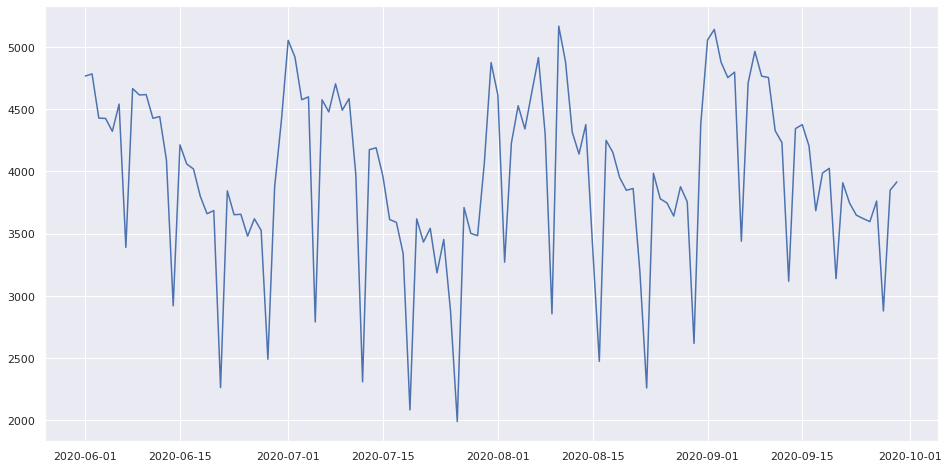

In [31]:
plt.figure(figsize=(16, 8))
plt.plot(df)
plt.show()

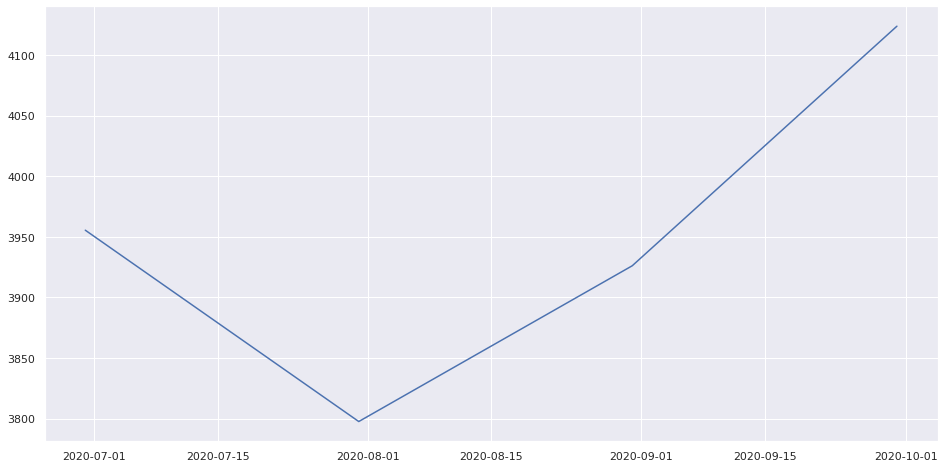

In [32]:
plt.figure(figsize=(16, 8))
plt.plot(df.resample("M").mean())
plt.show()

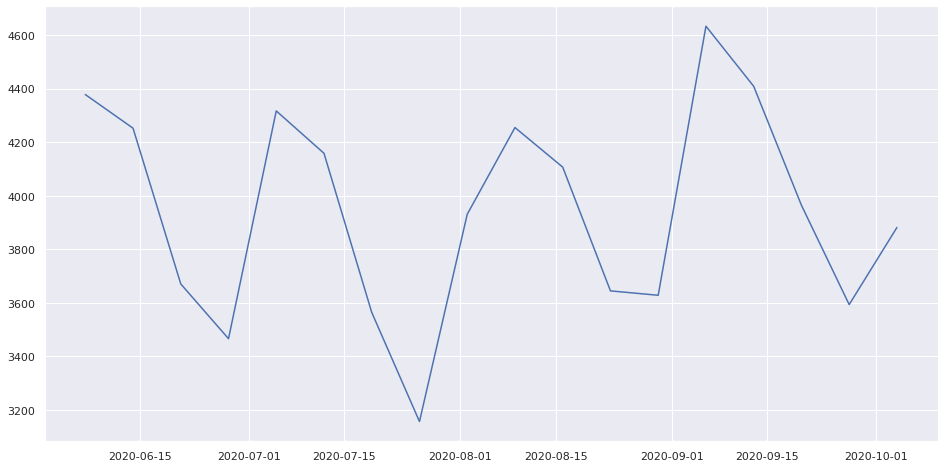

In [33]:
plt.figure(figsize=(16, 8))
plt.plot(df.resample("W").mean())
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


AttributeError: 'AxesSubplot' object has no attribute 'set_size_inches'

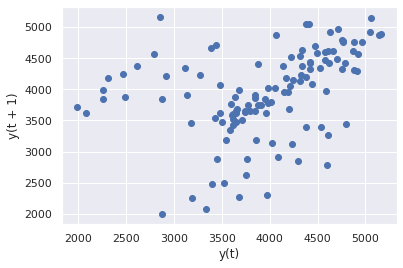

In [48]:
fig = pd.plotting.lag_plot(df, lag=1)
fig.set_size_inches((16, 8))
plt.tight_layout()
plt.show()

In [37]:
result = adfuller(df["Value"])

print(f"Test Statistic: {result[0]}")
print(f"p-Value: {result[1]}")
print(f"Critical Values: {result[4]}")
print()
if result[1] > 0.05:
    print("Time Series is not Stationary")
else:
    print("Time Series is Stationary")

Test Statistic: -5.198570901268631
p-Value: 8.851341293954556e-06
Critical Values: {'1%': -3.4912451337340342, '5%': -2.8881954545454547, '10%': -2.5809876033057852}

Time Series is Stationary


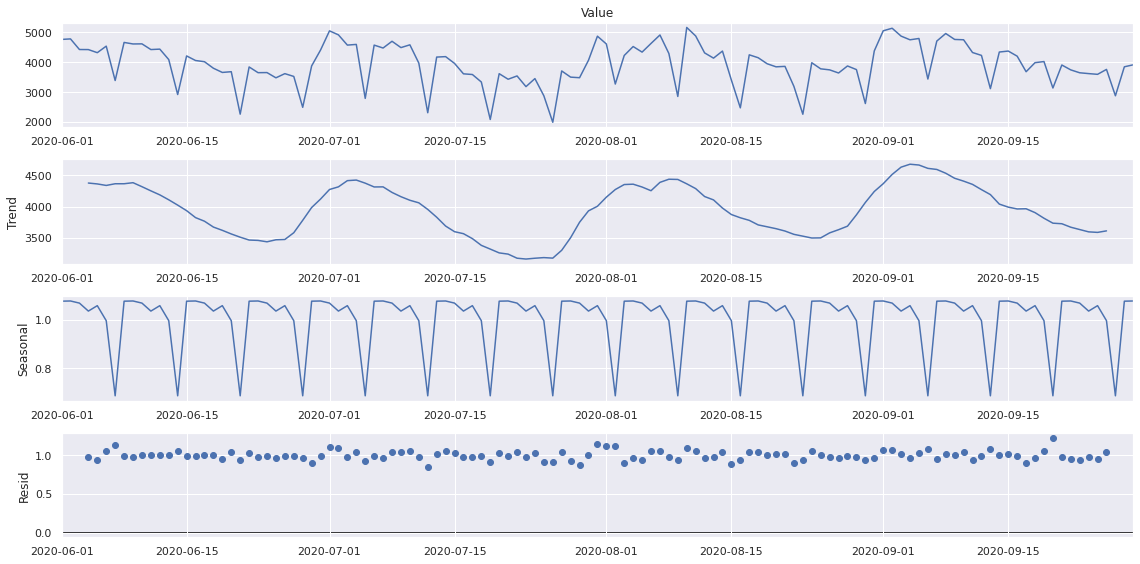

In [44]:
result = seasonal_decompose(df["Value"], model="mul")
fig = result.plot()
fig.set_size_inches((16, 8))
plt.tight_layout()
plt.show()

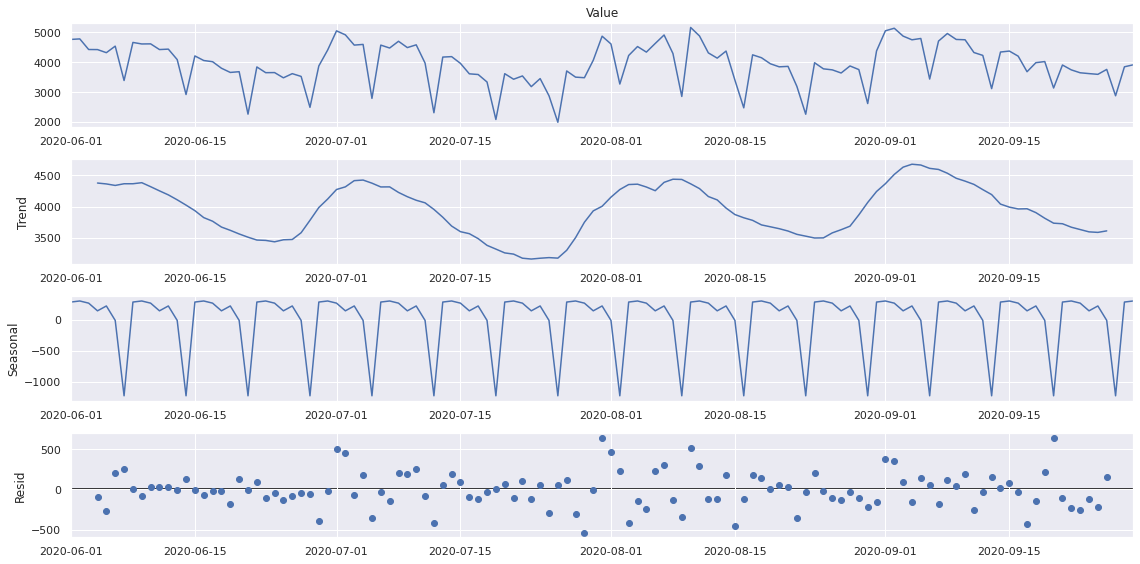

In [45]:
result = seasonal_decompose(df["Value"], model="add")
fig = result.plot()
fig.set_size_inches((16, 8))
plt.tight_layout()
plt.show()

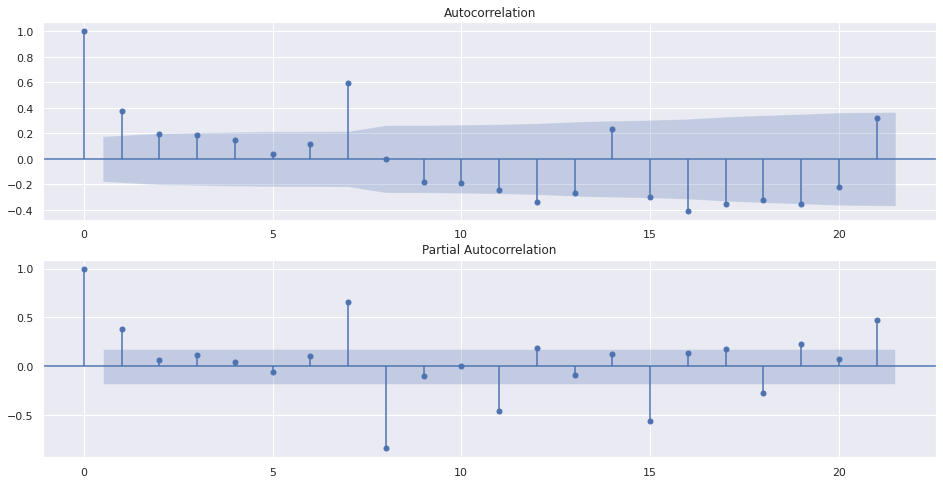

In [47]:
fig = plt.figure(figsize=(16, 8))

ax1 = fig.add_subplot(211)
fig = plot_acf(df["Value"], ax=ax1)

ax2 = fig.add_subplot(212)
fig = plot_pacf(df["Value"], ax=ax2)

plt.show()